In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyupbit
from sklearn import preprocessing

In [2]:
ticker = 'KRW-BTC'
interval = 'day'
to = '2022-01-19'
count = 30
bitcoin = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))
pd.options.display.float_format = '{:.2f}'.format

In [3]:
bitcoin.reset_index(inplace=True)
bitcoin = bitcoin.rename(columns={'index':'date'})
bitcoin= bitcoin.drop_duplicates(['date'])
bitcoin = bitcoin.astype({'open': int, 'high': int, 'low': int, 'close':int})
bitcoin

,date,open,high,low,close,volume,value
0,2021-12-20 09:00:00,58329000,58616000,56917000,58011000,6685.61,385840635557.56
1,2021-12-21 09:00:00,57980000,60650000,57500000,60023000,6637.67,394352689438.52
2,2021-12-22 09:00:00,60023000,60772000,59605000,59753000,5773.96,347172202153.78
3,2021-12-23 09:00:00,59759000,61925000,59120000,61490000,6471.53,389081707456.72
4,2021-12-24 09:00:00,61490000,62850000,61250000,61939000,5243.54,325690062280.69
5,2021-12-25 09:00:00,61939000,62500000,61107000,61177000,3730.37,230679684124.70
6,2021-12-26 09:00:00,61177000,61939000,60288000,61467000,4350.54,265030001351.94
7,2021-12-27 09:00:00,61467000,62500000,60934000,61508000,5287.23,325512198487.45
8,2021-12-28 09:00:00,61470000,61508000,57912000,58274000,7303.09,436619790606.59
9,2021-12-29 09:00:00,58261000,58763000,56650000,57089000,8038.00,465098505559.70


In [4]:
bitcoin = bitcoin.drop(["open","high","low", "volume", "value"], axis=1)

In [5]:
bitcoin

,date,close
0,2021-12-20 09:00:00,58011000
1,2021-12-21 09:00:00,60023000
2,2021-12-22 09:00:00,59753000
3,2021-12-23 09:00:00,61490000
4,2021-12-24 09:00:00,61939000
5,2021-12-25 09:00:00,61177000
6,2021-12-26 09:00:00,61467000
7,2021-12-27 09:00:00,61508000
8,2021-12-28 09:00:00,58274000
9,2021-12-29 09:00:00,57089000


In [6]:
#"KRW-ETH", "KRW-NU", "KRW-ALGO", "KRW-NEAR"
ticker = 'KRW-ETH'
interval = 'day'
to = '2022-01-19'
count = 30
ethereum = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))
pd.options.display.float_format = '{:.2f}'.format
ethereum.reset_index(inplace=True)
ethereum = ethereum.rename(columns={'index':'date'})
ethereum= ethereum.drop_duplicates(['date'])
ethereum = ethereum.astype({'open': int, 'high': int, 'low': int, 'close':int})
ethereum

,date,open,high,low,close,volume,value
0,2021-12-20 09:00:00,4899000,4947000,4700000,4866000,53342.44,255754689727.84
1,2021-12-21 09:00:00,4866000,4996000,4818000,4936000,48674.27,239450815721.83
2,2021-12-22 09:00:00,4937000,4990000,4850000,4893000,37319.32,183801200817.07
3,2021-12-23 09:00:00,4893000,5010000,4802000,4971000,51755.71,253148731225.17
4,2021-12-24 09:00:00,4971000,5025000,4913000,4937000,40049.96,199532555550.88
5,2021-12-25 09:00:00,4937000,4994000,4894000,4954000,24017.01,118703904022.24
6,2021-12-26 09:00:00,4954000,4979000,4890000,4917000,22468.35,110686382182.91
7,2021-12-27 09:00:00,4917000,4957000,4864000,4896000,26616.36,130793474415.24
8,2021-12-28 09:00:00,4896000,4899000,4630000,4650000,47598.61,226682654962.47
9,2021-12-29 09:00:00,4650000,4682000,4423000,4456000,45101.87,206638930993.20


In [7]:
ethereum = ethereum.drop(["date", "open","high","low", "volume", "value"], axis=1)
ethereum

,close
0,4866000
1,4936000
2,4893000
3,4971000
4,4937000
5,4954000
6,4917000
7,4896000
8,4650000
9,4456000


In [8]:
#"KRW-ETH", "KRW-NU", "KRW-ALGO", "KRW-NEAR"
ticker = "KRW-NU"
interval = 'day'
to = '2022-01-19'
count = 30
nucypher = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))
pd.options.display.float_format = '{:.2f}'.format
nucypher.reset_index(inplace=True)
nucypher = nucypher.rename(columns={'index':'date'})
nucypher= nucypher.drop_duplicates(['date'])
nucypher = nucypher.astype({'open': int, 'high': int, 'low': int, 'close':int})
nucypher

,date,open,high,low,close,volume,value
0,2021-12-20 09:00:00,915,936,871,889,28478643.68,25421298640.13
1,2021-12-21 09:00:00,889,912,872,908,18534323.48,16567506580.33
2,2021-12-22 09:00:00,912,934,895,914,35572562.11,32466129172.30
3,2021-12-23 09:00:00,914,975,905,969,43729543.69,40727039373.96
4,2021-12-24 09:00:00,968,998,944,955,47687978.73,46362002810.45
5,2021-12-25 09:00:00,954,1020,948,1000,67477199.87,67165434680.07
6,2021-12-26 09:00:00,1000,1010,967,1000,32681747.51,32345354803.27
7,2021-12-27 09:00:00,1000,1010,980,992,26170514.54,26060624828.42
8,2021-12-28 09:00:00,993,993,900,911,35496378.94,33727274528.13
9,2021-12-29 09:00:00,911,938,887,905,37920200.02,34510545626.39


In [9]:
nucypher = nucypher.drop(["date", "open","high","low", "volume", "value"], axis=1)
nucypher

,close
0,889
1,908
2,914
3,969
4,955
5,1000
6,1000
7,992
8,911
9,905


In [10]:
#"KRW-ETH", "KRW-NU", "KRW-ALGO", "KRW-NEAR"
ticker = "KRW-ALGO"
interval = 'day'
to = '2022-01-19'
count = 30
algo = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))
pd.options.display.float_format = '{:.2f}'.format
algo.reset_index(inplace=True)
algo = algo.rename(columns={'index':'date'})
algo= algo.drop_duplicates(['date'])
algo = algo.astype({'open': int, 'high': int, 'low': int, 'close':int})
algo

,date,open,high,low,close,volume,value
0,2021-12-20 09:00:00,1695,1700,1570,1610,5935326.44,9607036968.98
1,2021-12-21 09:00:00,1605,1680,1590,1670,3525374.99,5780483868.08
2,2021-12-22 09:00:00,1670,1750,1645,1675,6606791.32,11178706126.14
3,2021-12-23 09:00:00,1680,1800,1655,1780,15036933.61,25718624143.02
4,2021-12-24 09:00:00,1780,2025,1760,1920,29857535.93,56573255064.18
5,2021-12-25 09:00:00,1920,1970,1860,1905,15244688.83,29109970675.96
6,2021-12-26 09:00:00,1905,1995,1885,1940,15773592.13,30671150098.41
7,2021-12-27 09:00:00,1940,2080,1905,2015,16342431.45,32367725452.59
8,2021-12-28 09:00:00,2015,2020,1785,1795,16001029.32,30289485843.40
9,2021-12-29 09:00:00,1795,1995,1715,1940,14002152.22,25950314120.45


In [11]:
algo = algo.drop(["date", "open","high","low", "volume", "value"], axis=1)
algo

,close
0,1610
1,1670
2,1675
3,1780
4,1920
5,1905
6,1940
7,2015
8,1795
9,1940


In [12]:
#"KRW-ETH", "KRW-NU", "KRW-ALGO", "KRW-NEAR"
ticker = "KRW-NEAR"
interval = 'day'
to = '2022-01-19'
count = 30
near = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))
pd.options.display.float_format = '{:.2f}'.format
near.reset_index(inplace=True)
near = near.rename(columns={'index':'date'})
near= near.drop_duplicates(['date'])
near = near.astype({'open': int, 'high': int, 'low': int, 'close':int})
near

,date,open,high,low,close,volume,value
0,2021-12-20 09:00:00,11250,11300,10340,10500,2183190.53,23549015795.56
1,2021-12-21 09:00:00,10500,11500,10490,11340,2963896.06,32222566527.38
2,2021-12-22 09:00:00,11350,14480,11130,13330,18721431.42,249970109468.69
3,2021-12-23 09:00:00,13320,17580,13170,16640,50242950.86,811132909508.01
4,2021-12-24 09:00:00,16650,19400,16440,18380,56525031.46,1018842775183.39
5,2021-12-25 09:00:00,18390,19200,17330,18450,29225930.24,532722406936.29
6,2021-12-26 09:00:00,18440,19690,17680,19600,18240469.87,337811009899.46
7,2021-12-27 09:00:00,19590,19890,17700,17950,14965014.47,279346051280.22
8,2021-12-28 09:00:00,17960,18060,15880,16350,17224505.58,295940760067.14
9,2021-12-29 09:00:00,16340,18500,15910,18330,20004120.87,343642297687.56


In [13]:
near = near.drop(["date", "open","high","low", "volume", "value"], axis=1)
near

,close
0,10500
1,11340
2,13330
3,16640
4,18380
5,18450
6,19600
7,17950
8,16350
9,18330


In [14]:
coins = pd.concat([bitcoin, ethereum, nucypher, algo, near], axis=1)
coins

,date,close,close,close,close,close
0,2021-12-20 09:00:00,58011000,4866000,889,1610,10500
1,2021-12-21 09:00:00,60023000,4936000,908,1670,11340
2,2021-12-22 09:00:00,59753000,4893000,914,1675,13330
3,2021-12-23 09:00:00,61490000,4971000,969,1780,16640
4,2021-12-24 09:00:00,61939000,4937000,955,1920,18380
5,2021-12-25 09:00:00,61177000,4954000,1000,1905,18450
6,2021-12-26 09:00:00,61467000,4917000,1000,1940,19600
7,2021-12-27 09:00:00,61508000,4896000,992,2015,17950
8,2021-12-28 09:00:00,58274000,4650000,911,1795,16350
9,2021-12-29 09:00:00,57089000,4456000,905,1940,18330


In [15]:
coins.columns=['date', 'BTC', 'ETH', 'NU', 'ALGO', 'NEAR']
coins

,date,BTC,ETH,NU,ALGO,NEAR
0,2021-12-20 09:00:00,58011000,4866000,889,1610,10500
1,2021-12-21 09:00:00,60023000,4936000,908,1670,11340
2,2021-12-22 09:00:00,59753000,4893000,914,1675,13330
3,2021-12-23 09:00:00,61490000,4971000,969,1780,16640
4,2021-12-24 09:00:00,61939000,4937000,955,1920,18380
5,2021-12-25 09:00:00,61177000,4954000,1000,1905,18450
6,2021-12-26 09:00:00,61467000,4917000,1000,1940,19600
7,2021-12-27 09:00:00,61508000,4896000,992,2015,17950
8,2021-12-28 09:00:00,58274000,4650000,911,1795,16350
9,2021-12-29 09:00:00,57089000,4456000,905,1940,18330


In [16]:
coins=coins.set_index('date')
coins

,BTC,ETH,NU,ALGO,NEAR
date,,,,,
2021-12-20 09:00:00,58011000,4866000,889,1610,10500
2021-12-21 09:00:00,60023000,4936000,908,1670,11340
2021-12-22 09:00:00,59753000,4893000,914,1675,13330
2021-12-23 09:00:00,61490000,4971000,969,1780,16640
2021-12-24 09:00:00,61939000,4937000,955,1920,18380
2021-12-25 09:00:00,61177000,4954000,1000,1905,18450
2021-12-26 09:00:00,61467000,4917000,1000,1940,19600
2021-12-27 09:00:00,61508000,4896000,992,2015,17950
2021-12-28 09:00:00,58274000,4650000,911,1795,16350


In [17]:
from datetime import datetime,date
coins.index = pd.DatetimeIndex(coins.index).normalize()

In [18]:
coins

,BTC,ETH,NU,ALGO,NEAR
date,,,,,
2021-12-20,58011000,4866000,889,1610,10500
2021-12-21,60023000,4936000,908,1670,11340
2021-12-22,59753000,4893000,914,1675,13330
2021-12-23,61490000,4971000,969,1780,16640
2021-12-24,61939000,4937000,955,1920,18380
2021-12-25,61177000,4954000,1000,1905,18450
2021-12-26,61467000,4917000,1000,1940,19600
2021-12-27,61508000,4896000,992,2015,17950
2021-12-28,58274000,4650000,911,1795,16350


In [19]:
#coins.to_csv("data/final/coins.csv")

In [20]:
coins = pd.read_csv("data/final/coins.csv", index_col=0)
coins

,BTC,ETH,NU,ALGO,NEAR
date,,,,,
2021-12-20,58011000,4866000,889,1610,10500
2021-12-21,60023000,4936000,908,1670,11340
2021-12-22,59753000,4893000,914,1675,13330
2021-12-23,61490000,4971000,969,1780,16640
2021-12-24,61939000,4937000,955,1920,18380
2021-12-25,61177000,4954000,1000,1905,18450
2021-12-26,61467000,4917000,1000,1940,19600
2021-12-27,61508000,4896000,992,2015,17950
2021-12-28,58274000,4650000,911,1795,16350


In [21]:
#데이터 수, 평균, 표준편차, 최소값, 최대값
coins.describe()

,BTC,ETH,NU,ALGO,NEAR
count,30.00,30.00,30.00,30.00,30.00
mean,55778033.33,4394566.67,864.37,1837.83,18935.00
std,3774124.80,418895.98,84.20,171.17,3388.73
min,51179000.00,3780000.00,732.00,1590.00,10500.00
25%,52181250.00,3976500.00,782.25,1676.25,17627.50
50%,56332000.00,4480500.00,894.00,1792.50,18715.00
75%,58208250.00,4812500.00,919.00,1940.00,21082.50
max,61939000.00,4971000.00,1000.00,2195.00,24490.00


In [22]:
#스케일 조정을 통해(표준화) 0~100 사이의 수로 나타냄
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(coins)

coins_scaled = pd.DataFrame(scaled, columns = coins.columns)
coins_scaled = coins_scaled.set_index(pd.DatetimeIndex(coins.index))
coins_scaled

,BTC,ETH,NU,ALGO,NEAR
date,,,,,
2021-12-20,63.49,91.18,58.58,3.31,0.00
2021-12-21,82.19,97.06,65.67,13.22,6.00
2021-12-22,79.68,93.45,67.91,14.05,20.23
2021-12-23,95.83,100.00,88.43,31.40,43.89
2021-12-24,100.00,97.15,83.21,54.55,56.33
2021-12-25,92.92,98.57,100.00,52.07,56.83
2021-12-26,95.61,95.47,100.00,57.85,65.05
2021-12-27,95.99,93.70,97.01,70.25,53.25
2021-12-28,65.94,73.05,66.79,33.88,41.82


In [23]:
#coins_scaled.to_csv("data/final/coins_scaled.csv")

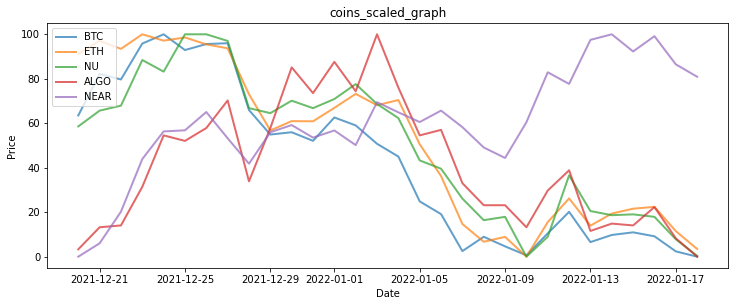

In [24]:
coins_scaled_graph = coins_scaled
plt.figure(figsize=(12.2, 4.5))
for c in coins_scaled_graph.columns.values:
    plt.plot(coins_scaled_graph[c], alpha=.7, lw=2)
plt.title("coins_scaled_graph")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(coins_scaled_graph.columns.values, loc='upper left')
plt.show()

In [25]:
#일일손익률
coins_dsr = coins.pct_change(1)

In [26]:
#변동성
coins_dsr.std()

BTC    0.02
ETH    0.03
NU     0.04
ALGO   0.05
NEAR   0.09
dtype: float64

In [27]:
#화폐 간 연동성 분석
coins_dsr.corr()

,BTC,ETH,NU,ALGO,NEAR
BTC,1.00,0.78,0.71,0.64,0.32
ETH,0.78,1.00,0.79,0.53,0.20
NU,0.71,0.79,1.00,0.60,0.22
ALGO,0.64,0.53,0.60,1.00,0.51
NEAR,0.32,0.20,0.22,0.51,1.00


In [39]:
coins_correlation=coins_dsr.corr()

In [40]:
#coins_correlation.to_csv("data/final/coins_correlation.csv")

C:\Users\hmin0\AppData\Local\Temp/ipykernel_10372/708135345.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(coins_correlation, dtype=np.bool)


<AxesSubplot:>

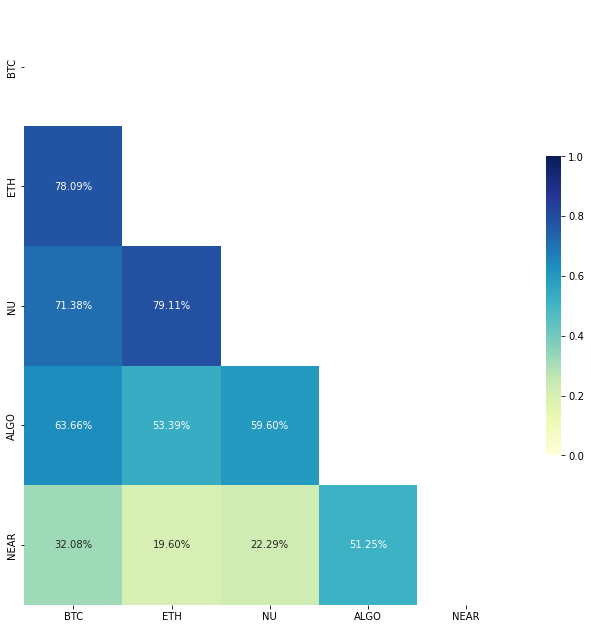

In [45]:
#위를 시각화, 여기선 색이 진할수록 연관성 낮음
plt.subplots(figsize=(11,11))
mask = np.zeros_like(coins_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
            coins_correlation, 
            cmap="YlGnBu",
            annot=True, mask=mask, 
            cbar_kws={"shrink": .5}, vmin=0, vmax=1,
            fmt='.2%')